### 1. Chargement des données

In [57]:
import pandas as pd

# Charger les données
data = pd.read_csv("run\detection_results.csv")

# Afficher les premières lignes
print(data.head())

# Informations sur les données
print(data.info())

   frame_id  object_id object_type   position_x  position_y  position_z  \
0         0          1         car    42.413399  447.133240           0   
1         0          2       truck   559.396484  408.111084           0   
2         0          3         car   949.831665  449.853577           0   
3         0          4       truck  1128.651611  482.465698           0   
4         0          5         car    78.321663  407.437103           0   

   object_length  object_width  object_height  heading  
0     146.383789     84.674820     146.383789        0  
1     330.613159    327.418701     330.613159        0  
2     227.213135    299.005615     227.213135        0  
3     440.587402    300.836426     440.587402        0  
4      59.155579    104.996628      59.155579        0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9959 entries, 0 to 9958
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   frame_i

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Beeclick\AppData\Local\Temp\ipykernel_6832\3202681527.py:4: SyntaxWarning: invalid escape sequence '\d'
  data = pd.read_csv("run\detection_results.csv")


### 2. Nettoyage des données

In [58]:
# Vérifier les valeurs manquantes
print(data.isnull().sum())

frame_id         0
object_id        0
object_type      0
position_x       0
position_y       0
position_z       0
object_length    0
object_width     0
object_height    0
heading          0
dtype: int64


In [59]:
# Remplacer ou supprimer les valeurs manquantes
data = data.fillna(0)  # Remplacer par 0 ou une autre valeur appropriée

In [60]:
# Vérifier les doublons
print(data.duplicated().sum())

0


In [61]:
# Supprimer les doublons 
data = data.drop_duplicates()

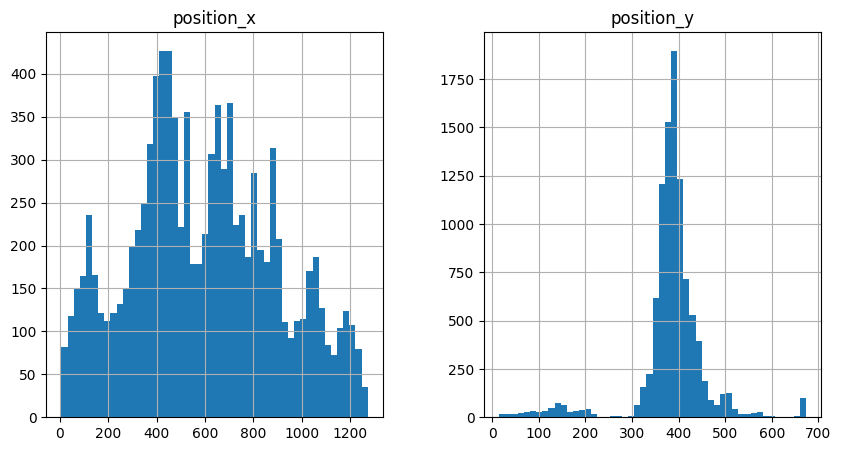

In [62]:
# Détecter les valeurs aberrantes
import matplotlib.pyplot as plt

# Visualiser les distributions
data[["position_x", "position_y"]].hist(bins=50, figsize=(10, 5))
plt.show()

### 3. Normalisation des données

In [63]:
from sklearn.preprocessing import MinMaxScaler

# Colonnes à normaliser
columns_to_normalize = ["position_x", "position_y", "position_z", "object_length", "object_width", "object_height"]

# Appliquer la normalisation
scaler = MinMaxScaler()
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

# Afficher les données normalisées
print(data.head())

   frame_id  object_id object_type  position_x  position_y  position_z  \
0         0          1         car    0.027931    0.656311         0.0   
1         0          2       truck    0.436653    0.596980         0.0   
2         0          3         car    0.745327    0.660447         0.0   
3         0          4       truck    0.886700    0.710032         0.0   
4         0          5         car    0.056320    0.595955         0.0   

   object_length  object_width  object_height  heading  
0       0.230177      0.056329       0.230177        0  
1       0.563665      0.250263       0.563665        0  
2       0.376492      0.227563       0.376492        0  
3       0.762738      0.229026       0.762738        0  
4       0.072279      0.072565       0.072279        0  


### 4. Encodage des caractéristiques catégorielles

In [64]:
# Encodage one-hot pour object_type
data = pd.get_dummies(data, columns=["object_type"], prefix="type")

# Afficher les données encodées
data.head()

,frame_id,object_id,position_x,position_y,position_z,object_length,object_width,object_height,heading,type_backpack,type_bench,type_bus,type_car,type_handbag,type_person,type_potted plant,type_skateboard,type_traffic light,type_train,type_truck
0,0,1,0.027931,0.656311,0.0,0.230177,0.056329,0.230177,0,False,False,False,True,False,False,False,False,False,False,False
1,0,2,0.436653,0.596980,0.0,0.563665,0.250263,0.563665,0,False,False,False,False,False,False,False,False,False,False,True
2,0,3,0.745327,0.660447,0.0,0.376492,0.227563,0.376492,0,False,False,False,True,False,False,False,False,False,False,False
3,0,4,0.886700,0.710032,0.0,0.762738,0.229026,0.762738,0,False,False,False,False,False,False,False,False,False,False,True
4,0,5,0.056320,0.595955,0.0,0.072279,0.072565,0.072279,0,False,False,False,True,False,False,False,False,False,False,False


### 5. Regroupement des données par object_id

In [77]:
# Trier les données par object_id et frame_id
data_sorted = data.sort_values(by=["object_id", "frame_id"])
data_sorted.reset_index(inplace = True)
data_sorted.drop(["index"], axis = 1, inplace = True)

data_sorted.to_csv("data/data_sorted.csv", index=False)

# Afficher les données triées
data_sorted.head()



,frame_id,object_id,position_x,position_y,position_z,object_length,object_width,object_height,heading,type_backpack,type_bench,type_bus,type_car,type_handbag,type_person,type_potted plant,type_skateboard,type_traffic light,type_train,type_truck
0,209,-1,0.945574,0.613374,0.0,0.027097,0.036975,0.027097,0,False,False,False,True,False,False,False,False,False,False,False
1,209,-1,0.557710,0.741480,0.0,0.198345,0.885919,0.198345,0,False,False,False,False,False,False,False,False,False,True,False
2,210,-1,0.924228,0.608925,0.0,0.026469,0.033951,0.026469,0,False,False,False,True,False,False,False,False,False,False,False
3,210,-1,0.987605,0.584173,0.0,0.005150,0.016850,0.005150,0,False,False,False,True,False,False,False,False,False,False,False
4,210,-1,0.960703,0.597952,0.0,0.002067,0.010665,0.002067,0,False,False,False,True,False,False,False,False,False,False,False


### 5. Séparation des données

In [66]:
from sklearn.model_selection import train_test_split

# Séparer les caractéristiques (X) et les étiquettes (y)
X = data.drop(columns=["frame_id", "object_id", "heading"])  # Exclure les colonnes non pertinentes
y = data[["position_x", "position_y"]]  # Cibles à prédire

# Diviser les données
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Afficher les tailles des ensembles
print("Train set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (6971, 17) (6971, 2)
Validation set: (1494, 17) (1494, 2)
Test set: (1494, 17) (1494, 2)


### 6. Sauvegarde des données prétraitées

In [67]:
# Sauvegarder les ensembles de données
X_train.to_csv("data/X_train.csv", index=False)
y_train.to_csv("data/y_train.csv", index=False)
X_val.to_csv("data/X_val.csv", index=False)
y_val.to_csv("data/y_val.csv", index=False)
X_test.to_csv("data/X_test.csv", index=False)
y_test.to_csv("data/y_test.csv", index=False)

print("Données prétraitées sauvegardées.")

Données prétraitées sauvegardées.
